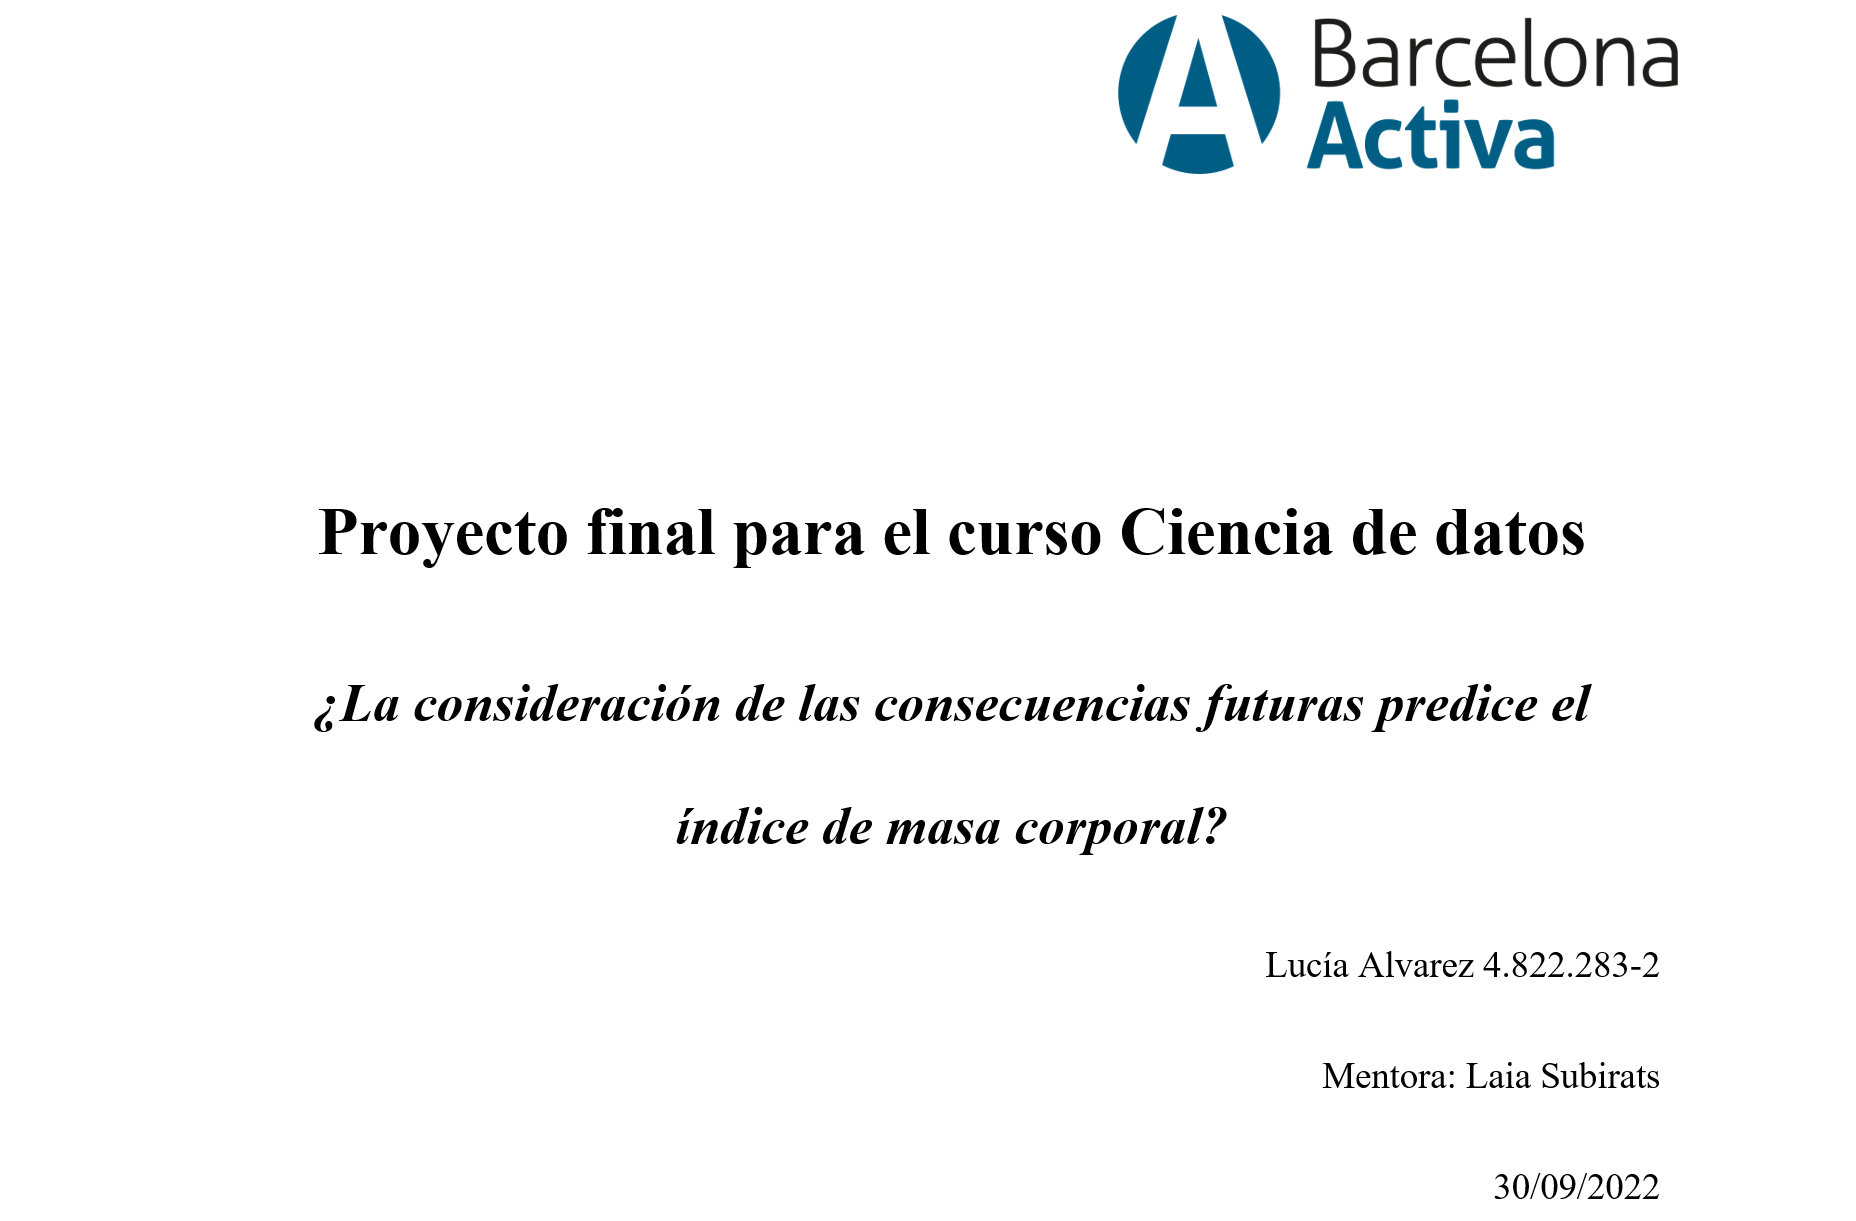

In [78]:
from IPython.display import Image
Image(filename='Title.png') 

El siguiente trabajo es parte del curso "Data Science" realizado en Barcelona Activa en el año 2022, de Lucía Alvarez.

El documento está formado por cinco partes:
- Descripción de los datos
- Sección donde se trabaja específicamente con la escala Consideración de las Consecuencias Futuras (CFC)
- Testeo de diferentes modelos para predecir el Índice de Masa Corporal (IMC)
- Evaluación de los modelos testeados
- Enlaces web de referencia para este trabajo

A continuación, se carga las librerías necesarias para este ejercicio y el dataframe.

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import pingouin as pg
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics 

In [80]:
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/Dataframe_proyecto.csv'
df = pd.read_csv(filename, sep=";",encoding="utf8", na_values = 999 ) 


# Introducción teórica

## Definición de las variables 
El siguiente trabajo es parte del curso Data Science realizado en Barcelona Activa en el año 2022. En este estudio se trabaja con el constructo Consideración de las Consecuencias Futuras (CFC) con la intención de explorar cómo la misma se relaciona con el Índice de Masa Corporal (IMC).


### Consideración de las Consecuencias Futuras
La CFC es un rasgo de personalidad con el cual se puede conocer el grado que las personas consideran y son influenciadas por los resultados inmediatos y distantes de sus acciones (Strathman et al., 1994). 
La CFC es evaluada mediante una escala likert de 14 ítems. La escala fue propuesta con una estructura unifactorial (Strathman et al., 1994). Estudios más recientes han propuesto una organización en dos factores correlacionados: Consideración de las Consecuencias Inmediatas (CFC_I) y Consideración de las Consecuencias Futuras (CFC_F) (Joireman et al., 2012). Las personas con elevada CFC_I tienden a realizar acciones que son gratificantes al instante, pero con resultados distantes negativos. Por ejemplo, el consumo de sustancias activas genera un placer hedonista, pero a la misma vez dificulta una adecuada salud futura. Mientras que las personas con elevada CFC_F tienden a realizar acciones con una recompensa futura, realizando ciertos sacrificios su presente. Por ejemplo, un estudiante universitario con elevada CFC_F tenderá a no salir los fines de semana (recompensa instantánea) con el fin de salvar un examen a futuro.


### Consideración de las Consecuencias Futuras y su relación con variables de salud
La mayoría de las acciones saludables requieren de sacrificios prolongados en el tiempo para obtener una recompensa en un futuro. Por ejemplo, salir a correr todos los días produce un beneficio a largo plazo, con un sacrificio inmediato. Por lo cual, se ha evidenciado que las personas con mayor orientación hacia los resultados distantes (alta CFC_F) tienden a reportar mayor realización de acciones saludables, en comparación con las personas con mayor orientación hacia los resultados inmediatos (alta CFC_I). Por ejemplo, CFC-I predice positivamente el índice de masa corporal (Adams, 2012) y negativamente las intenciones de comer saludablemente (Gick, 2014), mientras que CFC-F predice positivamente la realización de actividad física (Joireman et al., 2012; van Beek et al., 2013).

#### Objetivos:
En este estudio, se pretende evaluar si la CFC predice el IMC. Es importante tener en cuenta que un elevado IMC es considerado un factor de riesgo para las enfermedades crónicas (Camacho-Camargo et al., 2009). Por lo cual, se espera que el IMC se asocie positivamente con la CFC_I y negativamente con la CFC_F.

## Presentación del conjunto de datos escogido
La muestra está compuesta por 282 sujetos, de los cuales 187 son mujeres y 95 hombres. Del total de la muestra, 32 no completaron el ciclo secundario (liceo), 47 completaron el ciclo secundario, 138 son estudiantes universitarios, 50 tienen estudios universitarios terminados, 4 estudios de maestrías, 11 estudios de doctorado. 
El dataframe contiene: (a) los catorce ítems de la escala CFC, (b) la edad, sexo y educación (no completo el ciclo secundario, secundario completo, estudiante universitario, título universitario, título de maestría, Doctorado), (c) frecuencia de consumo de frutas, verduras y bebidas azucaradas ( nunca, menos de una vez por semana, una vez por día, dos o tres veces por día), (d) consumo de tabaco (fuma, no fuma),  (e) la altura y peso de cada participante, los cuales serán utilizados para calcular el IMC.
La recolección de datos se realizó en Uruguay, mediante un estudio descriptivo y no experimental. Los datos de este estudio se recolectaron para realizar mi tesis de maestría en la Facultad de Psicología de la Universidad de la República.  

## Características generales.
Este trabajo está compuesto por tres partes:
1) Descripción de los datos.

2) Descripción de los ítems de la escala CFC. Posteriormente se realiza un análisis de factores, con el fin de determinar los factores latentes del instrumento. Previo al análisis factorial se evalúa la adecuación de los datos mediante la prueba de Bartlett y Kaiser-Meyer-Olkin (KMO). Para seleccionar la cantidad de factores se evalúa los autovalores, varianza explicada por cada factor y las saturaciones de cada ítem (saturaciones mayores a .30 son consideradas adecuadas). A su vez, se tendrá en cuenta la teoría referida al constructo CFC (es esperado encontrar dos factores latentes, uno referido a los resultados inmediatos y otro referido a las consecuencias futuras). 

3) Testeo de diferentes modelos de predicción, con el fin de evaluar si la CFC predice el IMC. Para esto, se testea un análisis de regresión simple con CFC_I como predictor, luego un modelo con CFC_F. Como tercer modelo, se realiza un análisis de regresión múltiple con los factores latentes de la CFC edad, educación e ingreso mensual promedio de los participantes, variables sociodemográficas más usadas en los estudios previos (Adams, 2012; Murphy & Dockray, 2018). Por último, se testea un árbol de decisión con las ocho variables que presentan mayor correlación con el IMC, y un segundo árbol de decisión con las mismas variables que en el modelo de regresión múltiple.
En este estudio, la depuración de datos se realiza mediante el cálculo de puntuaciones Z y rango intercuartílico. A su vez, se trabaja con los datos estandarizados, con la excepción del árbol de decisión.

## Presentación de los objetivos:
Este estudio se centra en la aplicación de cinco análisis:
1. Análisis factorial: con el fin de identificar los factores latentes relacionados a la escala CFC, se seleccionó este tipo de análisis dado que se asume que hay factores latentes subyacentes a los datos.

2. Correlaciones: para evaluar la fuerza de las asociaciones de las variables. En este estudio, no se realiza un análisis de regresión simple con la CFC-F como predictora del IMC dado que la correlación entre ambas variables no es estadísticamente significativa (p > .05).

3. Análisis de regresión simple: Con el fin de evaluar si la CFC-I y CFC-F predicen el IMC.

4. Análisis de regresión múltiple: Para evaluar la influencia de los dos factores de la CFC (subescala inmediata y subescala futura) y variables sociodemográficas sobre el IMC.

5. Árboles de decisión (regresión): técnica de aprendizaje supervisado aplicada para crear un modelo explicativo y predictivo del IMC, considerando la CFC, variables sociodemográficas, consumo de alimentos saludables y sustancias psicoactivas.

El principal objetivo de este estudio es evaluar si la CFC predice el IMC. Se espera que CFC_I se asocie negativamente con el IMC y que la CFC_F predice positivamente el IMC (Joireman et al., 2006; Kooij et al., 2018; Murphy & Dockray, 2018).


# Primera parte: Descripción de los datos

In [15]:
df.head(5)

,ID,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,...,Altura,Peso,Edad,Educacion,Ingreso_mensual,Sexo,Frecuencia_Frutas,Frecuencia_verduras,Bebidas_azucaradas,Fuma
0,213,3,6,4,5,2,5,3,5,3,...,1.64,65,46,3,3,1,3,3,4,0
1,14,6,6,1,1,1,4,7,6,1,...,1.70,79,45,2,1,1,4,4,4,0
2,22,7,1,1,1,2,4,1,1,7,...,1.71,55,18,1,2,1,3,3,1,0
3,27,4,3,4,5,2,5,6,5,2,...,1.60,55,18,2,1,1,2,3,2,0
4,29,7,2,1,2,1,6,7,7,2,...,1.68,82,45,2,3,1,4,4,3,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   282 non-null    int64  
 1   CFC_1                282 non-null    int64  
 2   CFC_2                282 non-null    int64  
 3   CFC_3_I              282 non-null    int64  
 4   CFC_4_I              282 non-null    int64  
 5   CFC_5_I              282 non-null    int64  
 6   CFC_6                282 non-null    int64  
 7   CFC_7                282 non-null    int64  
 8   CFC_8                282 non-null    int64  
 9   CFC_9_I              282 non-null    int64  
 10  CFC_10_I             282 non-null    int64  
 11  CFC_11_I             282 non-null    int64  
 12  CFC_12_I             282 non-null    int64  
 13  CFC_13               282 non-null    int64  
 14  CFC_14               282 non-null    int64  
 15  Altura               282 non-null    flo

A continuación, se presenta el recuento total de cada variable, su media, desvío estándar, valor mínimo, valor máximo y los valores porcentuales 25, 50 y 75 del conjunto de datos.

La descripción de los datos se realiza mediante dos tablas con el fin de mostrar los descriptivos de todas las variables del dataframe.

In [17]:
df.iloc[:,:15].describe()

,ID,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,CFC_10_I,CFC_11_I,CFC_12_I,CFC_13,CFC_14
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,161.187943,5.315603,3.964539,2.702128,2.539007,2.184397,4.152482,4.475177,4.943262,3.021277,2.492908,2.787234,3.269504,5.570922,4.932624
std,93.921733,1.538256,1.813007,1.750423,1.616277,1.721139,1.871726,1.712760,1.658680,1.817151,1.729466,1.754743,1.769168,1.430578,1.515894
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,78.250000,4.250000,3.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000
50%,157.500000,6.000000,4.000000,2.000000,2.000000,1.000000,4.000000,5.000000,5.000000,3.000000,2.000000,2.000000,3.000000,6.000000,5.000000
75%,242.750000,7.000000,5.000000,4.000000,3.000000,3.000000,6.000000,6.000000,6.000000,4.000000,3.750000,4.000000,4.000000,7.000000,6.000000
max,322.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [18]:
df.iloc[:,15:].describe()

,Altura,Peso,Edad,Educacion,Ingreso_mensual,Sexo,Frecuencia_verduras,Fuma
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,1.675993,68.719858,33.812057,2.929078,2.882979,1.336879,3.297872,0.276596
std,0.090910,14.630547,12.987133,1.097687,1.191814,0.473484,0.874671,0.448110
min,1.490000,43.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.600000,58.000000,23.000000,2.000000,2.000000,1.000000,3.000000,0.000000
50%,1.680000,65.500000,30.000000,3.000000,3.000000,1.000000,3.500000,0.000000
75%,1.740000,78.750000,42.750000,3.000000,4.000000,2.000000,4.000000,1.000000
max,1.980000,125.000000,75.000000,6.000000,6.000000,2.000000,4.000000,1.000000


Descripción de los participantes según sexo y nivel educativo:

In [19]:
sexo= df.groupby('Sexo').count()
sexo.ID

Sexo
1    187
2     95
Name: ID, dtype: int64

In [20]:
sexo= df.groupby('Educacion').count()
sexo.ID

Educacion
1     32
2     47
3    138
4     50
5      4
6     11
Name: ID, dtype: int64

# Segunda parte: Escala Consideración de las consecuencias futuras
## Descripción de los ítems

En esta sección vamos a trabajar con los 14 ítems de la escala Consideración de las Consecuencias Futuras.
Se pretende:
1. Profundizar en la descripción de los ítems de la escala CFC
2. Depurar los datos
3. Realizar un análisis factorial
4. Relacionar los factores obtenidos con las variables del dataframe

Para comenzar con este ejercicio, vamos a guardar en df_CFC los ítems de la escala y explorar los datos.


Nota: Los ítems que evalúan la consideración de las consecuencias inmediatas se referenciaron con "_I" al finalizar el nombre de la variable


In [21]:
df_CFC = df.iloc[ : , 1:15]
df_CFC

,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,CFC_10_I,CFC_11_I,CFC_12_I,CFC_13,CFC_14
0,3,6,4,5,2,5,3,5,3,5,4,4,3,4
1,6,6,1,1,1,4,7,6,1,1,1,3,7,6
2,7,1,1,1,2,4,1,1,7,7,5,1,6,3
3,4,3,4,5,2,5,6,5,2,3,4,1,5,4
4,7,2,1,2,1,6,7,7,2,2,2,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,5,7,6,6,7,6,7,7,6,6,2,5,5,5
278,7,7,1,1,7,7,7,1,7,1,1,7,7,7
279,7,4,1,1,7,1,7,4,7,1,1,1,7,7
280,5,3,4,2,1,5,3,6,3,1,2,2,7,6


In [22]:
df_CFC.isnull().sum()

CFC_1       0
CFC_2       0
CFC_3_I     0
CFC_4_I     0
CFC_5_I     0
CFC_6       0
CFC_7       0
CFC_8       0
CFC_9_I     0
CFC_10_I    0
CFC_11_I    0
CFC_12_I    0
CFC_13      0
CFC_14      0
dtype: int64

No hay valores perdidos, por eso no es necesario imputar datos. A continuación, se exploran los datos mediante un boxplot y patrón de correlación inter-item.


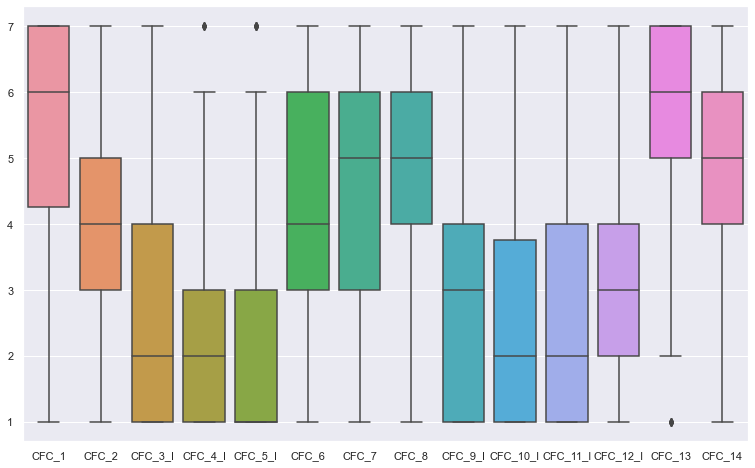

In [23]:
sns.set(rc = {'figure.figsize':(13,8)})

ax = sns.boxplot(data=df_CFC)

En el diagrama de cajas se observan posibles outlier en el ítem 4, 5 y 13 (casos mayores a 1,5 veces el Rango Intercuartílico, usualmente conocido como IQR.

Se continuará trabajando con todos los datos, dado que el análisis que se realizó previamente era a nivel ítem. Posteriormente, se evaluará si es necesario excluir casos en los factores latentes de estas variables observadas.

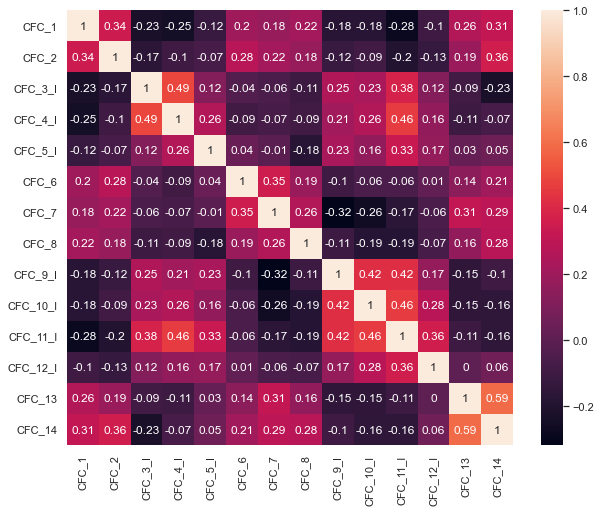

In [24]:
corr_df = df_CFC.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

Los ítems que refieren a lo inmediato (identificados como "_I") presentan una correlación positiva con los demás ítems que refieren a lo inmediato, mismo patrón se observa con los ítems referidos al futuro. A su vez, los ítems inmediatos reportan una correlación negativa con los ítems referidos al futuro.

Al estimar los coeficientes inter-ítems de la escala CFC se observan correlaciones positivas entre los ítems referidos a los resultados inmediatos, mismo patrón entre los ítems referidos a los resultados futuros. A su vez, los ítems inmediatos presentan una correlación negativa con los ítems futuros. La adecuación de la matriz fue confirmada con valores de la esfericidad de Bartlett de 841.48 con p < .01 y un Kaiser-Meyer-Olkin de 0.75. Los valores mencionados previamente indican que se puede continuar con el análisis de la estructura factorial.

## Análisis de factores
A continuación, se realiza un análisis factorial, con el fin de identificar las variables latentes que están compuestas por los ítems de la escala CFC. Se realiza este tipo de análisis dado que se asume que existen factores subyacentes a los valores observados.

In [25]:
scaler = StandardScaler()
CFC_escalado = pd.DataFrame(scaler.fit_transform(df_CFC), 
             columns=['CFC_1', 'CFC_2', 'CFC_3_I', 'CFC_4_I', 'CFC_5_I', 'CFC_6', 'CFC_7','CFC_8',
                      'CFC_9_I', 'CFC_10_I', 'CFC_11_I', 'CFC_12_I', 'CFC_13', 'CFC_14'])
CFC_escalado

,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,CFC_10_I,CFC_11_I,CFC_12_I,CFC_13,CFC_14
0,-1.508019,1.124695,0.742780,1.525337,-0.107327,0.453605,-0.862818,0.034267,-0.011730,1.452211,0.692364,0.413638,-1.800316,-0.616324
1,0.445708,1.124695,-0.974138,-0.953885,-0.689371,-0.081611,1.476746,0.638228,-1.114310,-0.864754,-1.020327,-0.152604,1.000727,0.705375
2,1.096951,-1.638057,-0.974138,-0.953885,-0.107327,-0.081611,-2.032600,-2.381577,2.193432,2.610693,1.263261,-1.285089,0.300467,-1.277173
3,-0.856776,-0.532956,0.742780,1.525337,-0.107327,0.453605,0.891855,0.034267,-0.563020,0.293729,0.692364,-1.285089,-0.399794,-0.616324
4,1.096951,-1.085507,-0.974138,-0.334080,-0.689371,0.988821,1.476746,1.242189,-0.563020,-0.285512,-0.449430,2.112365,1.000727,1.366224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-0.205534,1.677245,1.887392,2.145143,2.802891,0.988821,1.476746,1.242189,1.642142,2.031452,-0.449430,0.979880,-0.399794,0.044525
278,1.096951,1.677245,-0.974138,-0.953885,2.802891,1.524037,1.476746,-2.381577,2.193432,-0.864754,-1.020327,2.112365,1.000727,1.366224
279,1.096951,0.019594,-0.974138,-0.953885,2.802891,-1.687259,1.476746,-0.569694,2.193432,-0.864754,-1.020327,-1.285089,1.000727,1.366224
280,-0.205534,-0.532956,0.742780,-0.334080,-0.689371,0.453605,-0.862818,0.638228,-0.011730,-0.864754,-0.449430,-0.718847,1.000727,0.705375


### Pruebas de adecuación de los datos
A continuación, se evalúa la adecuación de los datos para realizar un análisis factorial. Para esto se realiza:
- Prueba de Bartlett 
- Prueba de Kaiser-Meyer-Olkin (KMO)


In [26]:
chi_square_value,p_value=calculate_bartlett_sphericity(CFC_escalado)
print("Esfericidad de Barlett :", chi_square_value.round(2), "con un p valor :", p_value.round(2))

kmo_all,kmo_model=calculate_kmo(CFC_escalado)
print("KMO: ", kmo_model.round(2))

Esfericidad de Barlett : 841.48 con un p valor : 0.0
KMO:  0.75


### Selección de número de factores latentes

A continuación, se realiza una curva elbow (o curva de codo) para explorar cuál sería el valor óptimo de factores.

Text(0, 0.5, 'Autovalores')

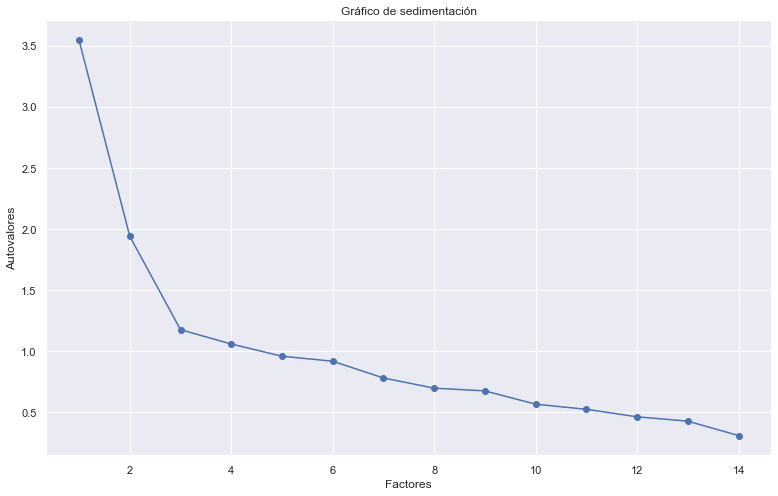

In [27]:
fa = FactorAnalyzer(rotation = "varimax",  method = "ml", n_factors=CFC_escalado.shape[1]) 
fa.fit(CFC_escalado)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,CFC_escalado.shape[1]+1),ev)
plt.plot(range(1,CFC_escalado.shape[1]+1),ev)
plt.title('Gráfico de sedimentación')
plt.xlabel('Factores')
plt.ylabel('Autovalores')

En el gráfico de sedimentación, podemos ver que los autovalores descienden por debajo de 1 desde el tercer factor. Por lo cual, se testea un modelo de tres factores y un segundo modelo de dos factores. El primer modelo testeado logra explicar el 35% de la varianza total. Mientras que el segundo modelo logra explicar el 30% de la varianza total. El tercer factor del segundo modelo logra aumentar únicamente un 5% de la varianza total explicada.

In [28]:
fa_3 = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_3.fit(CFC_escalado)
print('Varianza explicada del modelo de tres factores \n', 
      pd.DataFrame(fa_3.get_factor_variance(),index=['Varianza','Varianza proporcional','Varianza acumulada']))

Varianza explicada del modelo de tres factores 
                               0         1         2
Varianza               2.160589  2.025005  0.709186
Varianza proporcional  0.154328  0.144643  0.050656
Varianza acumulada     0.154328  0.298971  0.349627


In [29]:
fa_2 = FactorAnalyzer(n_factors=2, rotation='varimax')
fa_2.fit(CFC_escalado)
print('Varianza explicada del modelo de dos factores \n',
      pd.DataFrame(fa_2.get_factor_variance(),index=['Varianza','Varianza proporcional','Varianza acumulada']))

Varianza explicada del modelo de dos factores 
                               0         1
Varianza               2.165550  2.047351
Varianza proporcional  0.154682  0.146239
Varianza acumulada     0.154682  0.300922


A continuación, se visualizan las saturaciones de cada modelo testeado.

In [30]:
print(pd.DataFrame(fa_3.loadings_,index=CFC_escalado.columns).round(2))

             0     1     2
CFC_1    -0.27  0.44  0.01
CFC_2    -0.13  0.44  0.08
CFC_3_I   0.50 -0.27  0.25
CFC_4_I   0.59 -0.18  0.21
CFC_5_I   0.41  0.03 -0.03
CFC_6    -0.00  0.34  0.24
CFC_7    -0.11  0.41  0.54
CFC_8    -0.16  0.32  0.18
CFC_9_I   0.49 -0.14 -0.32
CFC_10_I  0.52 -0.16 -0.28
CFC_11_I  0.77 -0.18 -0.08
CFC_12_I  0.40  0.04 -0.12
CFC_13    0.00  0.60  0.09
CFC_14    0.03  0.84 -0.02


In [31]:
print(pd.DataFrame(fa_2.loadings_,index=CFC_escalado.columns).round(2))

             0     1
CFC_1    -0.27  0.43
CFC_2    -0.14  0.45
CFC_3_I   0.46 -0.19
CFC_4_I   0.56 -0.11
CFC_5_I   0.42  0.03
CFC_6    -0.02  0.39
CFC_7    -0.14  0.48
CFC_8    -0.18  0.35
CFC_9_I   0.49 -0.20
CFC_10_I  0.53 -0.21
CFC_11_I  0.79 -0.17
CFC_12_I  0.41  0.02
CFC_13   -0.01  0.61
CFC_14    0.01  0.78


En el primer modelo, el tercer factor presenta cargas mayores a .30 únicamente en dos ítems: ítem 7 con una saturación de .54 e ítem 9 con una saturación de -.32. Estos ítems corresponden a la consideración de la consecuencia futura e inmediata respectivamente. En el segundo modelo, en el primer factor cargan todos los ítems referidos a los resultados inmediatos, con cargas positivas y mayores a .30. Mientras que en el segundo factor cargan todos los ítems referidos a los resultados distantes, con cargas positivas y mayores a .30 Los resultados del modelo con dos factores es el esperado según la literatura previa (Joireman et al., 2012). Considerando las cargas factoriales, varianza explicada y la literatura previa, se continuará con el modelo de dos factores.

### Calculo de variables latentes


Se calculan los factores latentes según el modelo de dos factores.

In [32]:
df['CFC_I'] = ((df_CFC['CFC_3_I'] + df_CFC['CFC_4_I'] + df_CFC['CFC_5_I'] + df_CFC['CFC_9_I'] +
               df_CFC['CFC_10_I'] + df_CFC['CFC_11_I'] + df_CFC['CFC_12_I']) / 7 )

df['CFC_F'] = ((df_CFC['CFC_1'] + df_CFC['CFC_2'] + df_CFC['CFC_6'] + df_CFC['CFC_7'] +
               df_CFC['CFC_8'] + df_CFC['CFC_13'] + df_CFC['CFC_14']) / 7 )

df.head(5)

,ID,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,...,Edad,Educacion,Ingreso_mensual,Sexo,Frecuencia_Frutas,Frecuencia_verduras,Bebidas_azucaradas,Fuma,CFC_I,CFC_F
0,213,3,6,4,5,2,5,3,5,3,...,46,3,3,1,3,3,4,0,3.857143,4.142857
1,14,6,6,1,1,1,4,7,6,1,...,45,2,1,1,4,4,4,0,1.285714,6.000000
2,22,7,1,1,1,2,4,1,1,7,...,18,1,2,1,3,3,1,0,3.428571,3.285714
3,27,4,3,4,5,2,5,6,5,2,...,18,2,1,1,2,3,2,0,3.000000,4.571429
4,29,7,2,1,2,1,6,7,7,2,...,45,2,3,1,4,4,3,1,2.428571,6.142857


###  Descripción y depuración de datos de las variables latentes

A continuación, se realiza la depuración de los factores latentes mediante el calculo de las puntuaciones Z y rango intercuartílico.

In [33]:
df_Factores = df.loc[ : , ['CFC_I', 'CFC_F']]
df_Factores.head(5)

,CFC_I,CFC_F
0,3.857143,4.142857
1,1.285714,6.000000
2,3.428571,3.285714
3,3.000000,4.571429
4,2.428571,6.142857


In [34]:
z = np.abs(stats.zscore(df_Factores))
df_CFC = df_Factores[(z <3).all(axis = 1)]
print('ID de los casos con puntuación Z mayor a 3 \n',np.where(z > 3))
print('ID de los casos con puntuación Z menor a 3 \n', np.where(z < -3))

ID de los casos con puntuación Z mayor a 3 
 (array([], dtype=int64), array([], dtype=int64))
ID de los casos con puntuación Z menor a 3 
 (array([], dtype=int64), array([], dtype=int64))


No hay casos con puntuación Z mayor a 3. Por lo cual, no se eliminan valores por este criterio.

A continuación, se explora los datos mediante un boxplot y se realiza la depuración de datos mediante el rango intercuartílico.

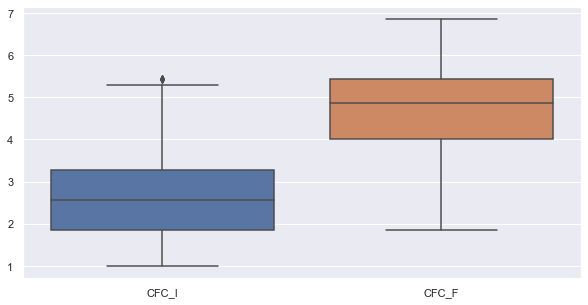

In [35]:
sns.set(style="darkgrid", rc = {'figure.figsize':(10,5)})
sns.boxplot(data=df_Factores)
plt.show()

In [36]:
df.shape[0]

282

In [37]:
q1 = np.quantile(df.CFC_I, 0.25)
q3 = np.quantile(df.CFC_I, 0.75)
med = np.median(df.CFC_I)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = df.CFC_I[(df.CFC_I <= lower_bound) | (df.CFC_I >= upper_bound)]
print('Los casos con valores atípicos en CFC_I son:\n',outliers)

Los casos con valores atípicos en CFC_I son:
 245    5.428571
270    5.428571
277    5.428571
Name: CFC_I, dtype: float64


In [38]:
df = df.drop([245, 270, 277])

In [39]:
df.shape[0]

279

Se encontraron 3 casos identificados como outliers mediante el calculo del rango intercuartílico. A continuación, se visualiza el bloxplot de CFC_I para verificar si se eliminaron correctamente los outliers.

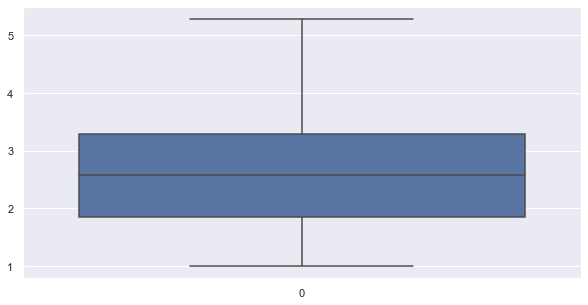

In [40]:
sns.set(style="darkgrid", rc = {'figure.figsize':(10,5)})
sns.boxplot(data=df.CFC_I)
plt.show()

Se explora  las asociaciones entre los factores latentes y el resto de las variables del dataframe.

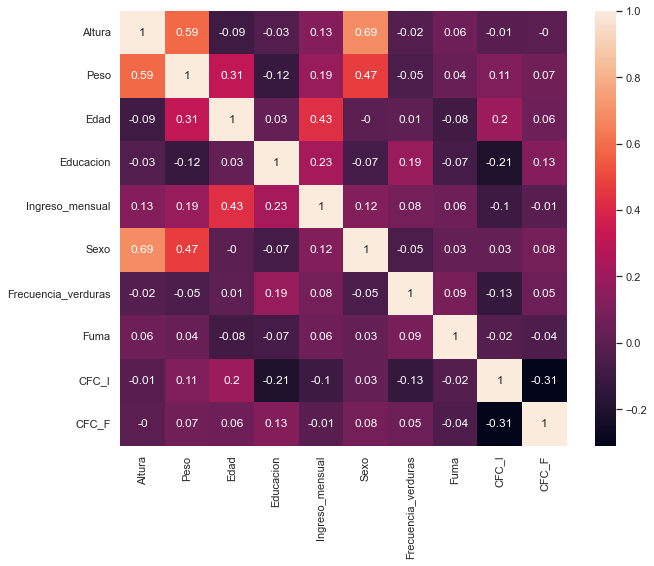

In [41]:
df_correlaciones = df.drop(['ID','CFC_1', 'CFC_2', 'CFC_3_I', 'CFC_4_I', 'CFC_5_I', 'CFC_6',
       'CFC_7', 'CFC_8', 'CFC_9_I', 'CFC_10_I', 'CFC_11_I', 'CFC_12_I',
       'CFC_13', 'CFC_14'], axis=1)

corr_df = df_correlaciones.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

###  Preparación de los datos para el análisis de regresión

A continuación, se calcula la variable "Índice de Masa Corporal" (IMC), la cual será incorporada como variable dependiente en los modelos de este estudio.

In [42]:
df['IMC'] = df.Peso/df.Altura**2
df.head(5)

,ID,CFC_1,CFC_2,CFC_3_I,CFC_4_I,CFC_5_I,CFC_6,CFC_7,CFC_8,CFC_9_I,...,Educacion,Ingreso_mensual,Sexo,Frecuencia_Frutas,Frecuencia_verduras,Bebidas_azucaradas,Fuma,CFC_I,CFC_F,IMC
0,213,3,6,4,5,2,5,3,5,3,...,3,3,1,3,3,4,0,3.857143,4.142857,24.167162
1,14,6,6,1,1,1,4,7,6,1,...,2,1,1,4,4,4,0,1.285714,6.000000,27.335640
2,22,7,1,1,1,2,4,1,1,7,...,1,2,1,3,3,1,0,3.428571,3.285714,18.809206
3,27,4,3,4,5,2,5,6,5,2,...,2,1,1,2,3,2,0,3.000000,4.571429,21.484375
4,29,7,2,1,2,1,6,7,7,2,...,2,3,1,4,4,3,1,2.428571,6.142857,29.053288


Para testear los modelos de regresión simple y multinivel se crea "df_Regresion" con las variables de interés para el estudio.

In [43]:
df_Regresion = df.loc[ : , ['CFC_I', 'CFC_F', 'Edad', 'Educacion', 'Ingreso_mensual', 'IMC']]
df_Regresion.head(5)

,CFC_I,CFC_F,Edad,Educacion,Ingreso_mensual,IMC
0,3.857143,4.142857,46,3,3,24.167162
1,1.285714,6.000000,45,2,1,27.335640
2,3.428571,3.285714,18,1,2,18.809206
3,3.000000,4.571429,18,2,1,21.484375
4,2.428571,6.142857,45,2,3,29.053288


In [44]:
df_Regresion.isnull().sum()

CFC_I              0
CFC_F              0
Edad               0
Educacion          0
Ingreso_mensual    0
IMC                0
dtype: int64

In [45]:
df_Regresion.shape[0]

279

Eliminar los outliers mediante el calculo de su puntuación Z

In [46]:
df_Regresion = df_Regresion[(np.abs(stats.zscore(df_Regresion)) < 3).all(axis=1)]
df_Regresion.shape[0]

274

Estandarización de los datos:

In [47]:
scaler = MinMaxScaler() #StandardScaler() 
df_Regresion_escalado = scaler.fit_transform(df_Regresion)
df_Regresion_escalado = pd.DataFrame(df_Regresion_escalado, columns=['CFC_I', 'CFC_F', 'Edad', 'Educacion', 'Ingreso_mensual', 'IMC'])
df_Regresion_escalado.head(5)

,CFC_I,CFC_F,Edad,Educacion,Ingreso_mensual,IMC
0,0.666667,0.457143,0.56,0.4,0.4,0.416535
1,0.066667,0.828571,0.54,0.2,0.0,0.567015
2,0.566667,0.285714,0.00,0.0,0.2,0.162070
3,0.466667,0.542857,0.00,0.2,0.0,0.289121
4,0.333333,0.857143,0.54,0.2,0.4,0.648591


Se explora las correlaciones de las variables.

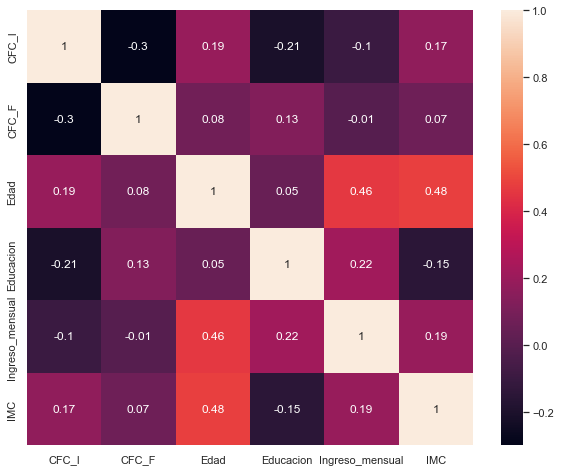

In [48]:
corr_df = df_Regresion_escalado.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

La subescala inmediata reporta correlaciones positivas con la Edad e IMC, y negativas con CFC_F, educación e ingreso mensual. Mientras que CFC-F presenta una asociación positiva con la edad, educación e IMC, y negativa con ingreso mensual. Las asociaciones de CFC_I con el resto de las variables son las esperadas. Dado que las personas con mayor tendencia a las consecuencias inmediatas de sus acciones tienden a tener menor orientación hacia los resultados distantes, educación e ingreso mensual, pero mayor IMC y edad. Las asociaciones entre CFC_F no son las esperadas, dado que se esperaría que esta subescala reportase una asociación negativa con el IMC y positiva con el ingreso mensual.

# Tercera parte: Testeo de los modelos
## Modelo 1: Regresión simple: ¿La subescala inmediata predice el indice de masa corporal?

Se evalúa las correlaciones entre la subescala inmediata e IMC

,n,r,CI95%,p-val,BF10,power
pearson,274,0.172598,"[0.06, 0.29]",0.004164,4.489,0.819851


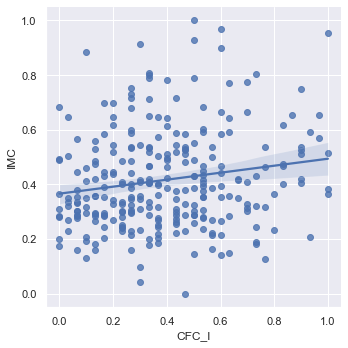

In [49]:
sns.lmplot(x="CFC_I", y="IMC", data=df_Regresion_escalado)
display(pg.corr(df_Regresion_escalado['CFC_I'], df_Regresion_escalado['IMC'], method='pearson'))

El gráfico y el test de correlación muestran una relación lineal, de intensidad pequeña (r = 0.17) y significativa (p-value < .05). 

In [50]:
X_CFC_I = df_Regresion_escalado['CFC_I'].values.reshape(-1,1)
y_CFC_I = df_Regresion_escalado['IMC'].values.reshape(-1,1)

X_train_CFC_I, X_test_CFC_I, y_train_CFC_I, y_test_CFC_I = train_test_split(X_CFC_I, y_CFC_I, test_size=0.3, random_state=0)

regressor_CFC_I = LinearRegression() 
regressor_CFC_I.fit(X_train_CFC_I, y_train_CFC_I)
print(regressor_CFC_I.intercept_)
print(regressor_CFC_I.coef_)

[0.39402757]
[[0.05966905]]


En el análisis de regresión simple, se observa que por cada unidad de cambio en CFC_I, el cambio en el IMC es de alrededor de 0.05 %. El análisis de regresión simple con la CFC no se realizó, dado que no se observó una correlación estadísticamente significativa entre CFC_F e IMC.

A continuación, se presenta el gráfico de barras mostrando las diferencias entre los valores reales y los predecidos

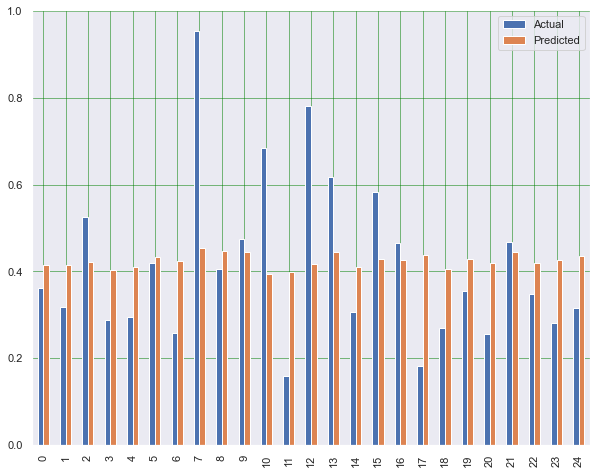

In [51]:
y_pred_CFC_I = regressor_CFC_I.predict(X_test_CFC_I)

df_transformados_CFC_I = pd.DataFrame({'Actual': y_test_CFC_I.flatten(), 'Predicted': y_pred_CFC_I.flatten()})
df_transformados_CFC_I = df_transformados_CFC_I.head(25)

df_transformados_CFC_I.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
y_400 = regressor_CFC_I.predict([[400]])

y_N100 = regressor_CFC_I.predict([[100]])

print("Si CFC_I es 400, el modelo nos predice un IMC de", int(y_400))

print("Si CFC_I es 100, el modelo nos predice un IMC de",int(y_N100))

Si CFC_I es 400, el modelo nos predice un IMC de 24
Si CFC_I es 100, el modelo nos predice un IMC de 6


## Modelo 2: Regresión simple: ¿La subescala futura predice el indice de masa corporal?

Se evalúa las correlaciones entre la subescala futura e IMC

,n,r,CI95%,p-val,BF10,power
pearson,274,0.067998,"[-0.05, 0.19]",0.261978,0.141,0.202238


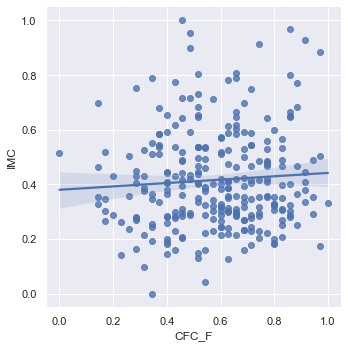

In [53]:
sns.lmplot(x="CFC_F", y="IMC", data=df_Regresion_escalado)
display(pg.corr(df_Regresion_escalado['CFC_F'], df_Regresion_escalado['IMC'], method='pearson'))

El IMC presenta una asociación positiva y pequeña con la CFC_I (r = .17 p < .05). No se observa una asociación significativa entre IMC y CFC_F.

### Modelo 3: Regresión múltiple 

En el modelo de regresión múltiple se seleccionó la subescala inmediata de la CFC, subescala futura de la CFC, edad, educación e ingreso mensual, con el fin de replicar el estudio de Adams (2012), en el cual se realiza un análisis de regresión múltiple con estas variables.

In [54]:
x_RM =df_Regresion_escalado.iloc[:,:5]

y_RM =df_Regresion_escalado.IMC
x_RM.head(5)

,CFC_I,CFC_F,Edad,Educacion,Ingreso_mensual
0,0.666667,0.457143,0.56,0.4,0.4
1,0.066667,0.828571,0.54,0.2,0.0
2,0.566667,0.285714,0.00,0.0,0.2
3,0.466667,0.542857,0.00,0.2,0.0
4,0.333333,0.857143,0.54,0.2,0.4


In [55]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = df_Regresion_escalado.iloc[:,:-1]

round(calc_vif(X),3)

,variables,VIF
0,CFC_I,2.669
1,CFC_F,4.854
2,Edad,3.478
3,Educacion,4.071
4,Ingreso_mensual,4.349


Los valores VIF obtenidos están en el rango esperado. Es importante recordar que un valor entre 1 y 5 indica una correlación moderada entre una variable predictora dada y otras variables predictoras en el modelo, pero esto a menudo no es lo suficientemente grave como para requerir atención.

In [56]:
def get_stats():
    results = sm.OLS(y_RM, x_RM).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    IMC   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              344.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   1.05e-114
Time:                        14:57:09   Log-Likelihood:                          102.37
No. Observations:                 274   AIC:                                     -194.7
Df Residuals:                     269   BIC:                                     -176.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Se elimina la variable educación, dado que presenta un p valor mayor a .05

In [57]:
x_RM = x_RM.drop(['Educacion'], axis=1)

get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    IMC   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              430.7
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   7.51e-116
Time:                        14:57:09   Log-Likelihood:                          101.90
No. Observations:                 274   AIC:                                     -195.8
Df Residuals:                     270   BIC:                                     -181.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

En el modelo de regresión múltiple, se seleccionó CFC_I, CFC_F, Edad e Ingreso mensual, dado que son las únicas variables que reportan una relación significativa. El modelo tiene un  R2 de .87, esto indica que es capaz de explicar el 87% de la variabilidad observada en el IMC. Al interpretar los coeficientes del modelo se observa que cada aumento de una unidad en: (a) CFC_I se asocia con un aumento de .24 en el IMC; (b) CFC_F se asocia con un aumento de .31 en el IMC; (c) Edad se asocia con un aumento de .29 en el IMC; (d) Ingreso mensual hay un aumento de 0.11 en el IMC. No se esperaba una predicción positiva entre CFC_F e IMC, dado que esto indica que las personas con mayor preocupación por los resultados distantes tienden a reportar elevado IMC.

In [58]:
X_RM = df_Regresion_escalado.drop(['Educacion', 'IMC'], axis=1)
y_RM = df_Regresion_escalado['IMC'].values.reshape(-1,1)
X_train_RM, X_test_RM, y_train_RM, y_test_RM = train_test_split(X_RM, y_RM, test_size=0.3, random_state=0)

regressor_RM = LinearRegression() 
regressor_RM.fit(X_train_RM, y_train_RM)
y_pred_RM =regressor_RM.predict(X_test_RM)

A continuación, se presenta una tabla mostrando las diferencias entre los valores reales, predichos y la diferencia entre ambos

In [59]:
y_test_RM = np.squeeze(y_test_RM)
y_pred_RM = np.squeeze(y_pred_RM)

pred_df=pd.DataFrame({'Valor actual':y_test_RM,'Valor predicho':y_pred_RM,'Diferencia':y_test_RM-y_pred_RM})
pred_df.head(5)

,Valor actual,Valor predicho,Diferencia
0,0.362530,0.342858,0.019672
1,0.318035,0.334178,-0.016143
2,0.526003,0.534674,-0.008671
3,0.287659,0.398541,-0.110882
4,0.295221,0.333097,-0.037876


## Testeo de un árbol de decisión (regresión)

Se testea un árbol de decisión con todas las variables del dataframe. Se excluyen los ítems de la CFC, la altura y peso dado que están incorporadas en otras variables (CFC_I, CFC_F e IMC).

Previo a realizar este análisis, se seleccionan los ítems con mayor asociación con el IMC para realizar el árbol de decisión.

In [60]:
df_arbol = df.drop(['ID','CFC_1', 'CFC_2', 'CFC_3_I', 'CFC_4_I', 'CFC_5_I', 'CFC_6',
       'CFC_7', 'CFC_8', 'CFC_9_I', 'CFC_10_I', 'CFC_11_I', 'CFC_12_I',
       'CFC_13', 'CFC_14', 'Altura', 'Peso'], axis=1)
corr_matrix = df_arbol.corr()
print(corr_matrix["IMC"].sort_values(ascending=False))

IMC                    1.000000
Edad                   0.443652
CFC_I                  0.146442
Ingreso_mensual        0.141136
Sexo                   0.133810
CFC_F                  0.086440
Fuma                   0.025847
Frecuencia_verduras   -0.057807
Educacion             -0.137280
Name: IMC, dtype: float64


In [61]:
df_Arbol = df[['IMC', 'Edad', 'CFC_I','Ingreso_mensual',
              'Sexo', 'CFC_F', 'Fuma', 'Frecuencia_verduras', 'Educacion']].copy()

df_Arbol.head(5)

,IMC,Edad,CFC_I,Ingreso_mensual,Sexo,CFC_F,Fuma,Frecuencia_verduras,Educacion
0,24.167162,46,3.857143,3,1,4.142857,0,3,3
1,27.335640,45,1.285714,1,1,6.000000,0,4,2
2,18.809206,18,3.428571,2,1,3.285714,0,3,1
3,21.484375,18,3.000000,1,1,4.571429,0,3,2
4,29.053288,45,2.428571,3,1,6.142857,1,4,2


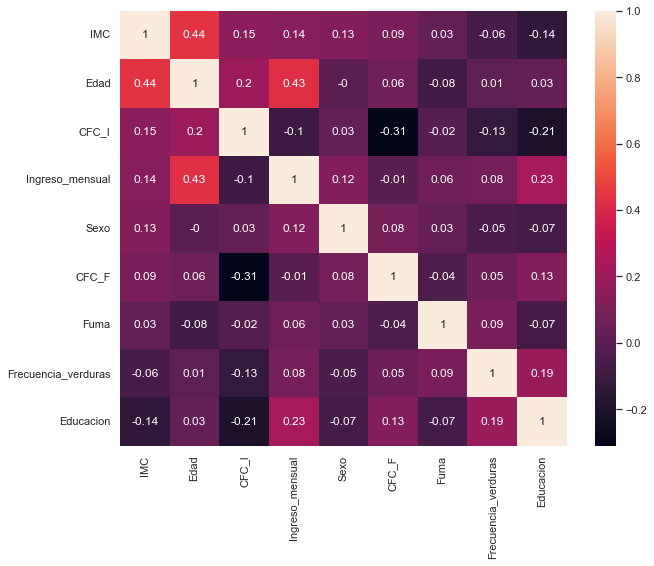

In [62]:
corr_df = df_Arbol.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

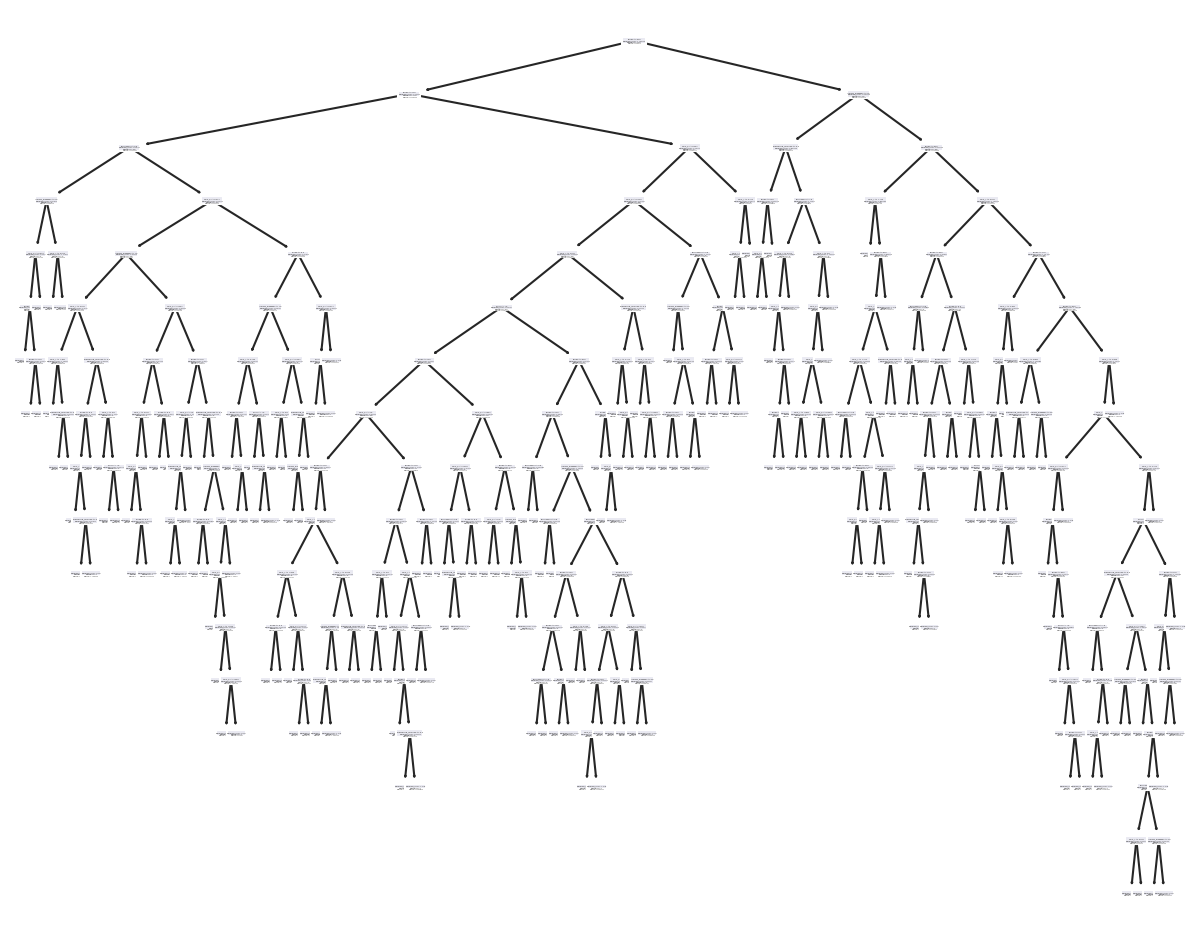

In [63]:
X = df_Arbol.iloc[:,1:]
y = df_Arbol.IMC

X_train_RT_1, X_test_RT_1, y_train_RT_1, y_test_RT_1 = train_test_split(X, y, test_size=0.3, random_state=44)

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train_RT_1, y_train_RT_1)

y_pred_RT_1 = model.predict(X_test_RT_1)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

A continuación, se presenta una tabla mostrando las diferencias entre los valores reales, predichos y la diferencia entre ambos

In [64]:
df_Arbol_comparar=pd.DataFrame({'Valor actual':y_test_RT_1, 'Valor predicho':y_pred_RT_1, 'Diferencia':y_test_RT_1-y_pred_RT_1})
df_Arbol_comparar.head(10)

,Valor actual,Valor predicho,Diferencia
28,21.875000,19.289379,2.585621
12,29.407596,31.741789,-2.334193
95,26.171875,26.609713,-0.437838
233,28.395062,24.453568,3.941493
268,26.122449,35.493827,-9.371378
261,26.573129,26.472107,0.101022
196,23.384354,24.767566,-1.383212
51,23.828125,26.666667,-2.838542
249,26.729927,20.202020,6.527907
33,21.484375,22.832879,-1.348504


Se modifica la profundidad del árbol de decisión para lograr una mejor visualización del modelo.

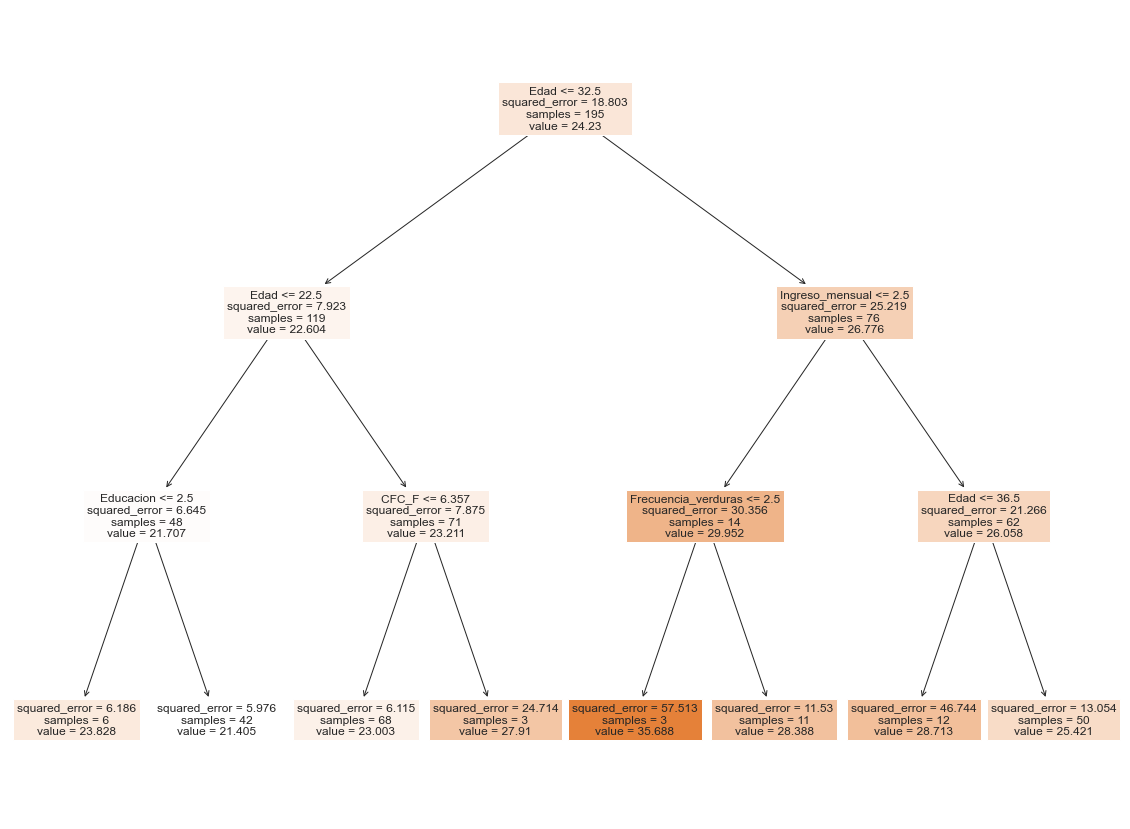

In [65]:
model = DecisionTreeRegressor(random_state=44, max_depth=3)
model.fit(X_train_RT_1, y_train_RT_1)
predictions = model.predict(X_test_RT_1)

fig = plt.figure(figsize=(20,15))
plot_tree(model, fontsize=12, feature_names=X.columns, filled=True);

En el primer árbol de decisión se observa que:

• Si la edad es <= a 22.5 años:

        - y su educación es <= a 2.5, predice 23.83 (N = 6)
        - y su educación es > a 2.5, predice 21.41 (N = 42)
        
• Si la edad es > a 22.5

        -  y su CFC-F es <= a 6.4, se predice 23.01 (N = 68)
        -  y su CFC-F es > a 6.4, se predice 27.8 (N =3)
• Si su edad es > a 32.5 y su ingreso es <= a 2.5:

        -  si su consumo de verduras es <= a 2.5, se predice 35.7 (N = 3)
        -  si su consumo de verduras es > a 2.5, se predice 28.4 (N = 11)
• Si su edad es > a 32.5, su ingreso es > a 2.5:

        -  si su edad es <= a 36.5 se predice 28.7 (N = 12)
        -  si su edad es > a 36.5 se predice 25.4 (N = 50)


In [66]:
fig.savefig("decistion_tree.png")

## Testeo de árbol de decisión considerando las mismas variables que en el análisis de regresión multiple

In [67]:
df_arbol_2 = df[['CFC_I', 'CFC_F', 'Edad', 'Ingreso_mensual', 'IMC']]
df_arbol_2.head(5)

,CFC_I,CFC_F,Edad,Ingreso_mensual,IMC
0,3.857143,4.142857,46,3,24.167162
1,1.285714,6.000000,45,1,27.335640
2,3.428571,3.285714,18,2,18.809206
3,3.000000,4.571429,18,1,21.484375
4,2.428571,6.142857,45,3,29.053288


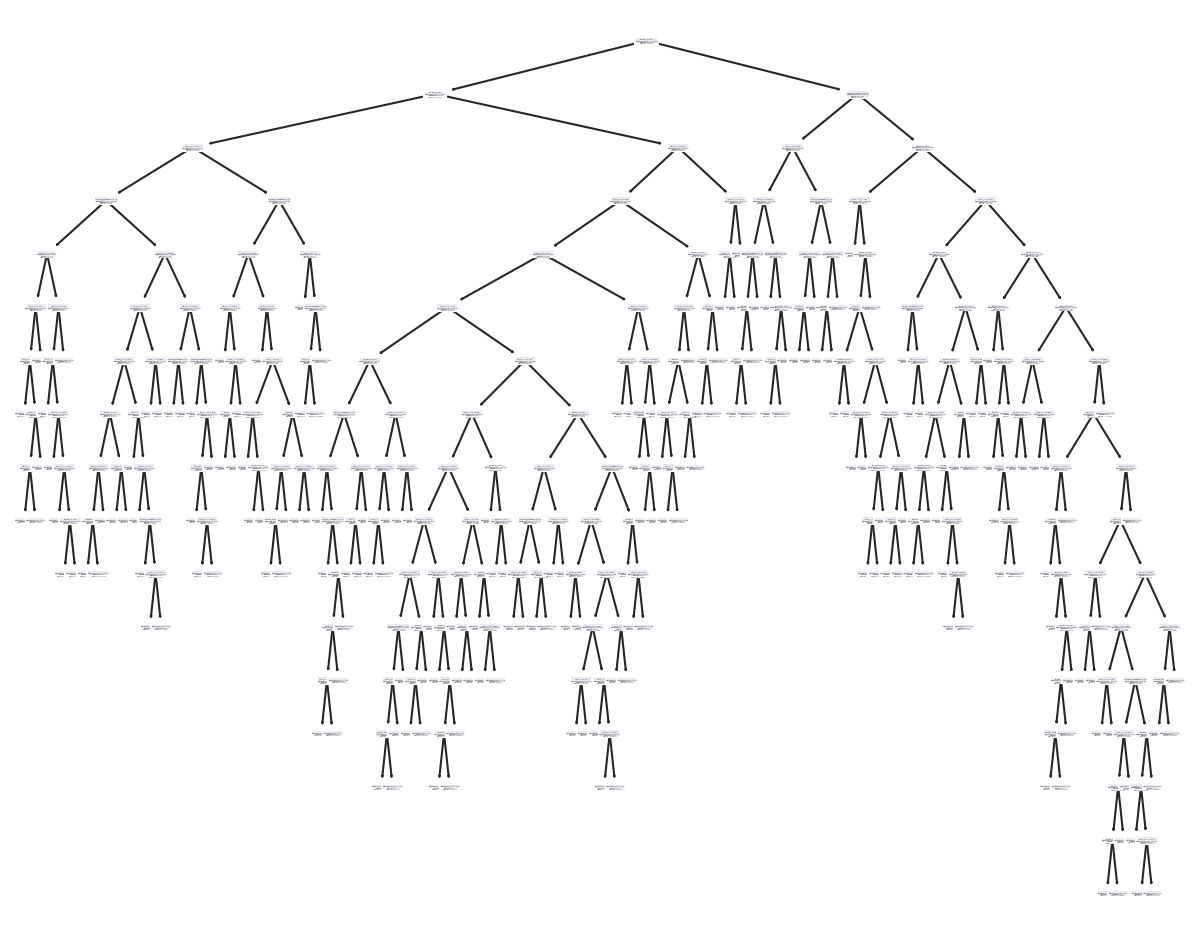

In [68]:
X = df_arbol_2.iloc[:,0:4]
y = df_arbol_2.IMC

X_train_RT_2, X_test_RT_2, y_train_RT_2, y_test_RT_2 = train_test_split(X, y, test_size=0.3, random_state=44)

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train_RT_2, y_train_RT_2)

y_pred_RT_2 = model.predict(X_test_RT_2)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [69]:
df_Arbol_comparar=pd.DataFrame({'Actual':y_test_RT_2, 'Predicted':y_pred_RT_2})
df_Arbol_comparar

,Actual,Predicted
28,21.875000,22.159109
12,29.407596,26.472107
95,26.171875,26.609713
233,28.395062,25.781250
268,26.122449,27.379665
...,...,...
134,21.887076,22.159109
154,26.573129,21.453574
263,29.757785,23.384354
58,23.510204,24.212293


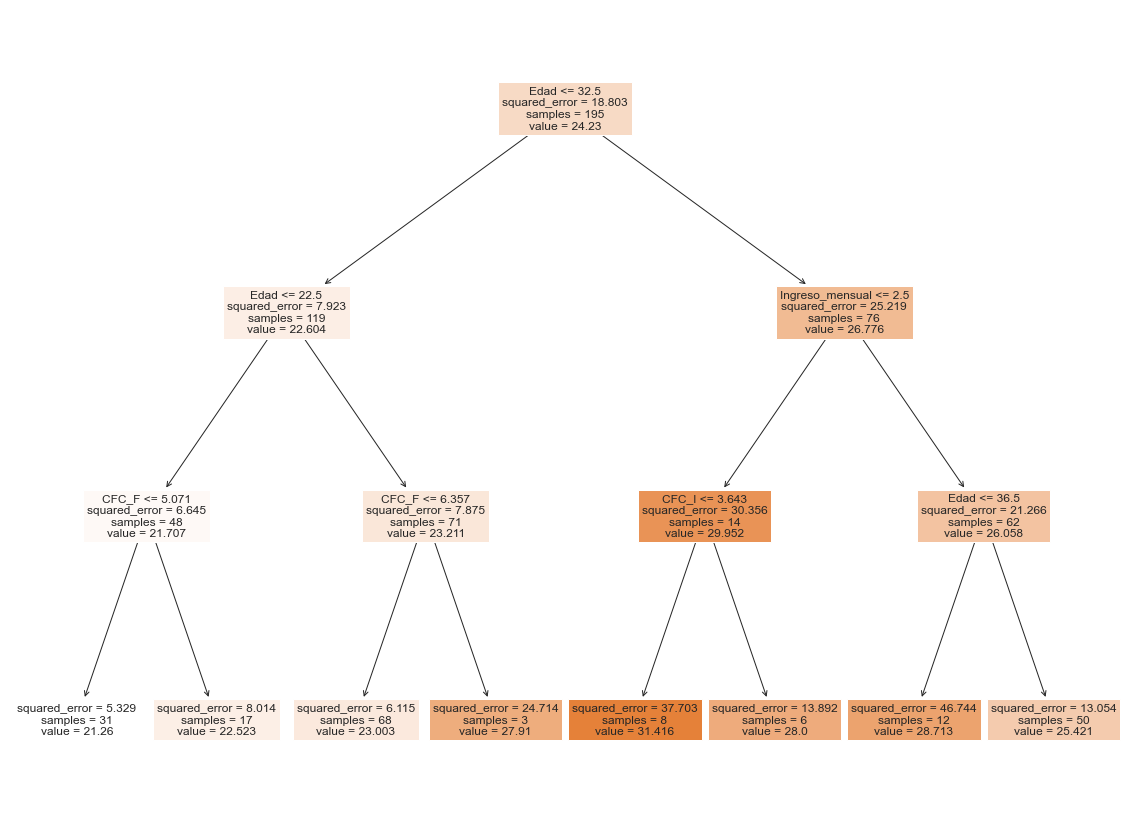

In [70]:
model = DecisionTreeRegressor(random_state=44, max_depth=3)
model.fit(X_train_RT_2, y_train_RT_2)
predictions = model.predict(X_test_RT_2)
fig = plt.figure(figsize=(20,15))
plot_tree(model, fontsize=12, feature_names=X.columns, filled=True);

En el segundo árbol de decisión se observa que:

• Si la edad es <= a 22.5 años:

        - y su CFC_F es <= a 5.1, predice 21.7 (N = 31)
        - y su CFC_F es > a 5.1, predice 22.53 (N = 17)
• Si la edad es > a 22.5

        - y su CFC-F es <= a 6.4, se predice 23.01 (N = 68)
        -  y su CFC-F ES > a 6.4, se predice 24.7 (N =91)
• Si su edad es > a 32.5 y su ingreso es <= a 2.5:

        -  si su CFC_I es <= a 3.6, se predice 37.7 (N = 8)
        -  si su CFC_I es > a 3.6, se predice 28.0 (N = 6)
• Si su edad es > a 32.5, su ingreso es > a 2.5:

        -  si su edad es <= a 36.5 se predice 28.7 (N = 12)
        -  si su edad es > a 36.5 se predice 25.4 (N = 50)


In [71]:
fig.savefig("decistion_tree_2.png")

# Tercera parte: Evaluación de los modelos testeados

In [72]:
print('Modelo de regresión simple: ¿CFC-I predice el IMC?: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_CFC_I, y_pred_CFC_I).round(3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_CFC_I, y_pred_CFC_I).round(3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_CFC_I, y_pred_CFC_I)).round(3))

Modelo de regresión simple: ¿CFC-I predice el IMC?: 
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.036
Root Mean Squared Error (RMSE): 0.19


In [73]:
print('Modelo 2 de regresión múltiple: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_RM, y_pred_RM).round(3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_RM, y_pred_RM).round(3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_RM, y_pred_RM)).round(3))

Modelo 2 de regresión múltiple: 
Mean Absolute Error (MAE): 0.136
Mean Squared Error (MSE): 0.031
Root Mean Squared Error (RMSE): 0.175


In [74]:
print('Modelo 3: Primer árbol de decisión ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_RT_1, y_pred_RT_1).round(3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_RT_1, y_pred_RT_1).round(3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_RT_1, y_pred_RT_1)).round(3))

Modelo 3: Primer árbol de decisión 
Mean Absolute Error (MAE): 3.75
Mean Squared Error (MSE): 23.352
Root Mean Squared Error (RMSE): 4.832


In [75]:
print('Modelo 4: Segundo árbol de decisión ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_RT_2, y_pred_RT_2).round(3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_RT_2, y_pred_RT_2).round(3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_RT_2, y_pred_RT_2)).round(3))

Modelo 4: Segundo árbol de decisión 
Mean Absolute Error (MAE): 3.654
Mean Squared Error (MSE): 22.915
Root Mean Squared Error (RMSE): 4.787


Al comparar todos los modelos se observa que el primer modelo es el que reporta menor MAE, menor MSE y menor RMSE de todos los modelos. Esto indica que es el modelo con menor magnitud promedio del error. Se podría concluir que el modelo de regresión lineal simple es el que presenta menor error. Empero, es importante considerar que es el que tiene menor complejidad. 
Al comparar los dos árboles de decisión se observa que el segundo modelo reporta mejores índices de adecuación.


# Conclusiones

Se logra cumplir parte de las hipótesis de este estudio. Por un lado, la CFC_I logra predecir negativamente el IMC. Por otro lado, la CFC_F no logra predecir el IMC como fue esperado. Primero, no se observó una correlación significativa entre CFC_F e IMC. Segundo, en el análisis de regresión multinivel se observa que la CFC_F se asocia positivamente con el IMC, y en el árbol de decisión no se observan un resultado claro de esta relación


Los resultados obtenidos podrían indicar que los resultados inmediatos son más determinantes en las acciones saludables que los distantes. Es decir, los sacrificios o placeres instantáneos tienen un mayor peso en la toma de decisiones referidas a la salud. Por ejemplo, a las personas que comienzan a correr les acondicionará con mayor fuerza el sacrificio de levantarse temprano, cansarse (consecuencia inmediata), que el tener el cuerpo deseado para el próximo verano (consecuencia futura). A su vez, se podría inferir que  la subescala inmediata presenta mayor  evidencia  de  validez  que la CFC_F. 


# Referencias bibliográficas

- Adams, J. (2012). Consideration of immediate and future consequences, smoking status, and body mass index. Health Psychology, 31(2), 260–263. https://doi.org/10.1037/a0025790

- Camacho-Camargo, N., Alvarado, J., Paoli, M., Molina, Z., Cicchetti, R., Santiago, J., Huber, A., & Molina, Y. (2009). Relación entre el índice de masa corporal y las cifras de tensión arterial en adolescentes. Revista Venezolana de Endocrinología y Metabolismo, 7(2), 17–24. http://ve.scielo.org/scielo.php?script=sci_arttext&pid=S1690-31102009000200003&lng=es&nrm=iso&tlng=es

- Gick, M. (2014). An exploration of interactions between Conscientiousness and Consideration of Future Consequences on healthy eating. Personality and Individual Differences, 66, 181–187. https://doi.org/10.1016/J.PAID.2014.03.020

- Joireman, J., Shaffer, M. J., Balliet, D., & Strathman, A. (2012). Promotion Orientation Explains Why Future-Oriented People Exercise and Eat Healthy: Evidence From the Two-Factor Consideration of Future Consequences-14 Scale. Personality and Social Psychology Bulletin, 38(10), 1272–1287. https://doi.org/10.1177/0146167212449362

- Joireman, J., Strathman, A., & Balliet, D. (2006). Considering Future Consequences: An Integrative Model. Judgments Over Time: The Interplay of Thoughts, Feelings, and Behaviors. https://doi.org/10.1093/ACPROF:OSO/9780195177664.003.0006

- Kooij, D., Kanfer, R., & Rudolph, C. W. (2018). Future Time Perspective: A Systematic Review and Meta-Analysis. Article in Journal of Applied Psychology. https://doi.org/10.1037/apl0000306

- Murphy, L., & Dockray, S. (2018). The Consideration of Future Consequences and Health Behaviour : A Meta-Analysis. Health Psychology Review, 0(0), 1–55. https://doi.org/10.1080/17437199.2018.1489298

- Strathman, A., Gleicher, F., Boninger, D. S., & Edwards, C. S. (1994). The consideration of future consequences: Weighing immediate and distant outcomes of behavior. Journal of Personality and Social Psychology, 66(4), 742–752. https://doi.org/10.1037/0022-3514.66.4.742

- van Beek, J., Antonides, G., & Handgraaf, M. J. J. (2013). Eat now, exercise later: The relation between consideration of immediate and future consequences and healthy behavior. Personality and Individual Differences, 54(6), 785–791. https://doi.org/10.1016/j.paid.2012.12.015


# Enlaces de referencia para este trabajo:

Carga de datos, manipulación y descripción de las variables:
- Idenfiticar 999 como valores perdidos: https://elmundodelosdatos.com/identificacion-valores-perdidos-python/
- Identificar los outliers: https://es.acervolima.com/detectar-y-eliminar-los-valores-atipicos-con-python/
- Detectar outliers: https://www.kutombawewe.com/es/python/detectar-y-excluir-valores-atipicos-en-el-marco-de-datos-de-pandas/1046331960/amp/
- Puntuación Z: https://statologos.com/remove-outliers-python/
- Box plot: https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/
- Escalar los datos: https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

Cómo ver las correlaciones de una variable contra el resto: https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

Visualización de los datos:
- Modificar las presentaciones de los gráficos: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
- Dibujar el boxplot: https://www.python-graph-gallery.com/30-basic-boxplot-with-seaborn

Análisis de factores:
- https://www.datacamp.com/tutorial/introduction-factor-analysis
- https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/
- https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729


- https://www.displayr.com/factor-analysis-and-principal-component-analysis-a-simple-explanation/


Regresión lineal: 
- https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn
- https://realpython.com/linear-regression-in-python/
- https://seaborn.pydata.org/tutorial/regression.html

Regresión múltiple:  
- https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922
- https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/
- http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
- https://statologos.com/factor-de-inflacion-de-la-varianza-r/

Árbol de decisión:
- https://data36.com/regression-tree-python-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
- https://www.iartificial.net/arboles-de-decision-con-ejemplos-en-python/

Por qué no se escalan datos en un árbol de decisión:
- https://www.atoti.io/articles/when-to-perform-a-feature-scaling/
- https://www.quora.com/Decision-Tree-based-models-dont-require-scaling-How-does-scaling-impact-the-predictions-of-decision-tree-based-models


Mayor información del dataframe empleado (ver estudio 2):
https://www.colibri.udelar.edu.uy/jspui/bitstream/20.500.12008/20038/1/Alvarez%20Nu%C3%B1ez%2C%20Luc%C3%ADa.pdf



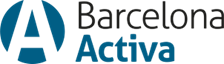

In [76]:
Image(filename='BA.png') 